In [379]:
#9-1 

#데이터 가져오기 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# 당뇨병 데이터셋 로드
diabetes = load_diabetes()

print (diabetes)


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [380]:
print (diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


In [381]:
# 데이터와 타겟을 데이터프레임으로 변환 - 모델에 예측할 x와 y 준비하기 
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=['target'])

# 데이터 확인
print(df_X.head())  # 상위 5개 행 출력
print(df_y.head())  # 타겟 값 출력

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
   target
0   151.0
1    75.0
2   141.0
3   206.0
4   135.0


In [382]:
# numpy array 변환
X_array = df_X.to_numpy()  # 또는 df_X.values
y_array = df_y.to_numpy().ravel()  # 1차원 배열로 변환

# 데이터 확인
print(type(X_array), X_array.shape)  # numpy.ndarray (442, 10)
print(type(y_array), y_array.shape)  # numpy.ndarray (442,)


<class 'numpy.ndarray'> (442, 10)
<class 'numpy.ndarray'> (442,)


In [383]:
# feature_names 수정 (s2, s3, s4 → 52, 53, 54로 변경)
modified_feature_names = [
    "age", "sex", "bmi", "bp", "s1", "s2", "s3","s4","s5", "s6",
]

for i, feature_name in enumerate(modified_feature_names):
    print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [384]:
print('<x_data[0]> : ',x_data[0])

print('<y_data[0]> : ',y_data[0])

<x_data[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
<y_data[0]> :  151.0


In [385]:
# Train data 와 Test data로 분리하기

from sklearn.model_selection import train_test_split

# 데이터를 train(80%) / test(20%)로 분리
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

# 데이터 크기 확인
print("X_train shape:", X_train.shape)  # (353, 10)
print("X_test shape:", X_test.shape)    # (89, 10)
print("y_train shape:", y_train.shape)  # (353,)
print("y_test shape:", y_test.shape)    # (89,)

X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


In [386]:
#모델 준비 하기

import numpy as np
W = np.random.rand(10)
b = np.random.rand()
print("W")
print("b")

W
b


In [387]:
W

array([0.71586425, 0.10272044, 0.70916245, 0.65984718, 0.17481966,
       0.72636716, 0.53934694, 0.56182721, 0.46509262, 0.19413192])

In [388]:
b

0.18060116622355493

In [389]:
#모델 준비 및 함수 구현하기 

def model(x_data, W, b):
    predictions = 0
    for i in range(10):
        predictions += x_data[:, i] * W[i]
    predictions += b
    return predictions
print("run")


run


In [390]:
#손실 함수 Loss를 정의 - MSE 함수로 정의
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("run")

def loss(x_data, W, b, y_data):
    predictions = model(x_data, W, b)
    L = MSE(predictions, y_data)
    return L
print("run")


run
run


In [391]:
print(x_data.shape, y_data.shape)
print(W, b)

(442, 10) (442,)
[0.71586425 0.10272044 0.70916245 0.65984718 0.17481966 0.72636716
 0.53934694 0.56182721 0.46509262 0.19413192] 0.18060116622355493


In [392]:
def gradient(x_data, w, b, y_data):
    dw = (loss(x_data, w + 0.0001, b, y_data) - loss(x_data, w, b, y_data)) / 0.0001
    db = (loss(x_data, w, b + 0.0001, y_data) - loss(x_data, w, b, y_data)) / 0.0001
    return dw, db
print("슝=3")

슝=3


In [378]:
#하이퍼 파라미터 학습률 설정
LEARNING_RATE = 0.001

#loss 설정
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 28676.8554
Iteration 20 : Loss 27788.4402
Iteration 30 : Loss 26934.8622
Iteration 40 : Loss 26114.7540
Iteration 50 : Loss 25326.8021
Iteration 60 : Loss 24569.7442
Iteration 70 : Loss 23842.3678
Iteration 80 : Loss 23143.5079
Iteration 90 : Loss 22472.0454
Iteration 100 : Loss 21826.9048
Iteration 110 : Loss 21207.0530
Iteration 120 : Loss 20611.4976
Iteration 130 : Loss 20039.2848
Iteration 140 : Loss 19489.4985
Iteration 150 : Loss 18961.2585
Iteration 160 : Loss 18453.7191
Iteration 170 : Loss 17966.0679
Iteration 180 : Loss 17497.5242
Iteration 190 : Loss 17047.3381
Iteration 200 : Loss 16614.7891
Iteration 210 : Loss 16199.1849
Iteration 220 : Loss 15799.8606
Iteration 230 : Loss 15416.1771
Iteration 240 : Loss 15047.5205
Iteration 250 : Loss 14693.3011
Iteration 260 : Loss 14352.9522
Iteration 270 : Loss 14025.9295
Iteration 280 : Loss 13711.7098
Iteration 290 : Loss 13409.7908
Iteration 300 : Loss 13119.6896
Iteration 310 : Loss 12840.9423
Iteration 320 : L

In [481]:
class MultiLinear:
  def __init__(self,learning_rate=0.1):
    self.w=None #모델의 weight 벡터 self.w=(w_1,w_2)
    self.b=None #모델의 bias
    self.lr=learning_rate #모델의 학습률
    self.losses=[] #매 에포크마다 손실을 저장하기 위한 리스트
    self.weight_history=[] #매 에포크마다 계산된 weight를 저장하기 위한 리스트
    self.bias_history=[] #매 에포크마다 계산된 bias를 저장하기 위한 리스트

  def forward(self,x):
    y_pred=np.sum(x*self.w)+self.b #np.sum함수는 인자로 받은 numpy배열의 모든 원소의 합을 return합니다.
    return y_pred

  def loss(self,x,y):
    y_pred=self.forward(x)
    return (y_pred-y)**2

  def gradient(self,x,y):
    y_pred=self.forward(x)
    w_grad=2*x*(y_pred-y)
    b_grad=2*(y_pred-y)

    return w_grad,b_grad

  def fit(self,x_data,y_data,epochs=20):
    self.w=np.ones(x_data.shape[1]) #모델의 weight들을 전부 1로 초기화
    self.b=0 #모델의 bias를 0으로 초기화
    for epoch in range(epochs):
      l=0 #계산할 손실값
      w_grad=np.zeros(x_data.shape[1]) #weight의 기울기를 누적할 numpy배열
      b_grad=0  #bias의 기울기를 누적할 변수

      for x,y in zip(x_data,y_data):
        l+=self.loss(x,y)
        w_i,b_i=self.gradient(x,y)

        w_grad+=w_i #weight누적
        b_grad+=b_i #bias누적

      self.w-=self.lr*(w_grad/len(y_data)) #weight 업데이트
      self.b-=self.lr*(b_grad/len(y_data)) #bias 업데이트
 
      print(f'epoch ({epoch+1}) ===> loss : {l/len(y_data):.5f}')
      self.losses.append(l/len(y_data)) #손실값 저장
      self.weight_history.append(self.w) #weight 배열 저장
      self.bias_history.append(self.b) #bias값 저장

In [482]:
model = MultiLinear(learning_rate=0.1)
model.fit(x_data,y_data,epochs=40)

epoch (1) ===> loss : 29055.28756
epoch (2) ===> loss : 20715.48312
epoch (3) ===> loss : 15375.24358
epoch (4) ===> loss : 11954.73452
epoch (5) ===> loss : 9762.86190
epoch (6) ===> loss : 8357.32549
epoch (7) ===> loss : 7455.05312
epoch (8) ===> loss : 6874.87857
epoch (9) ===> loss : 6500.85541
epoch (10) ===> loss : 6258.77792
epoch (11) ===> loss : 6101.15439
epoch (12) ===> loss : 5997.59010
epoch (13) ===> loss : 5928.63241
epoch (14) ===> loss : 5881.83158
epoch (15) ===> loss : 5849.21975
epoch (16) ===> loss : 5825.69748
epoch (17) ===> loss : 5808.00108
epoch (18) ===> loss : 5794.04176
epoch (19) ===> loss : 5782.48266
epoch (20) ===> loss : 5772.46817
epoch (21) ===> loss : 5763.45067
epoch (22) ===> loss : 5755.07965
epoch (23) ===> loss : 5747.13074
epoch (24) ===> loss : 5739.46035
epoch (25) ===> loss : 5731.97651
epoch (26) ===> loss : 5724.62036
epoch (27) ===> loss : 5717.35418
epoch (28) ===> loss : 5710.15383
epoch (29) ===> loss : 5703.00380
epoch (30) ===> los

          age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
bp   0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
s1   0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
s5   0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
s6   0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   

           s4        s5        s6  
age  0.203841  0.270777  0.301731  
sex  0.332115  0.149918  0.208133  
bmi  0.413807  0.446159  0.388680  
bp   0.2

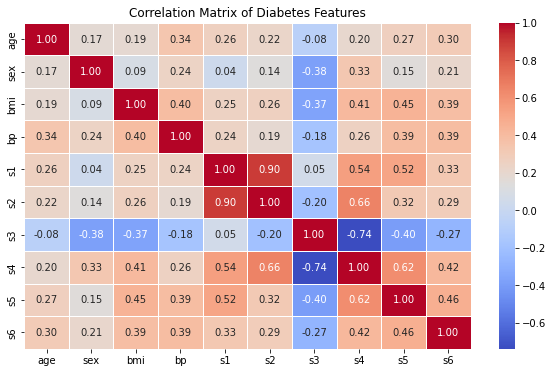

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임으로 변환
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# 상관 계수 계산
correlation_matrix = df_X.corr()

# 상관 계수 출력
print(correlation_matrix)

# 히트맵으로 상관 계수 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Diabetes Features')
plt.show()

In [498]:
# 데이터와 타겟을 데이터프레임으로 변환 - 모델에 예측할 x와 y 준비하기 
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=['target'])

# 데이터 확인
print(df_X.head())  # 상위 5개 행 출력
print(df_y.head())  # 타겟 값 출력

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
   target
0   151.0
1    75.0
2   141.0
3   206.0
4   135.0


In [499]:
# Select the specific columns you want (e.g., the first 4 features)
selected_features = ['bp', 's1', 's2', 's3', 's4', 's5', 's6']  # Corrected to a list

# Filter the DataFrame to only include those columns
df_X_reduced = df_X[selected_features]

# Convert the filtered DataFrame to a NumPy array
X_array_reduced = df_X_reduced.to_numpy()

# Convert y to a 1-dimensional array (flatten)
y_array = df_y.to_numpy().ravel()

# Verify the shape and print the first row of reduced features
print(type(X_array_reduced), X_array_reduced.shape)  # Expected: numpy.ndarray (442, 7)
print(type(y_array), y_array.shape)  # Expected: numpy.ndarray (442,)

# Print the first row of the reduced features
print('<X_array_reduced[0]> : ', X_array_reduced[0])  # Should show the first row with selected features

# Feature names for the selected 7 columns (updated to match the selected features)
modified_feature_names = [
    "bp", "s1", "s2", "s3", "s4", "s5", "s6"
]

# Print the modified feature names
for i, feature_name in enumerate(modified_feature_names):
    print(f'feature {i+1} : {feature_name}')

# Print the first value of the target variable (y)
print('<y_array[0]> : ', y_array[0])

<class 'numpy.ndarray'> (442, 7)
<class 'numpy.ndarray'> (442,)
<X_array_reduced[0]> :  [ 0.02187235 -0.0442235  -0.03482076 -0.04340085 -0.00259226  0.01990842
 -0.01764613]
feature 1 : bp
feature 2 : s1
feature 3 : s2
feature 4 : s3
feature 5 : s4
feature 6 : s5
feature 7 : s6
<y_array[0]> :  151.0


In [500]:
# Train data 와 Test data로 분리하기

from sklearn.model_selection import train_test_split

# 데이터를 train(80%) / test(20%)로 분리
X_train, X_test, y_train, y_test = train_test_split(X_array_reduced, y_array, test_size=0.2, random_state=42)

# 데이터 크기 확인
print("X_train shape:", X_train.shape)  # (353, 4)
print("X_test shape:", X_test.shape)    # (89, 4)
print("y_train shape:", y_train.shape)  # (353,)
print("y_test shape:", y_test.shape)    # (89,)


X_train shape: (353, 7)
X_test shape: (89, 7)
y_train shape: (353,)
y_test shape: (89,)


In [501]:
#모델 준비 하기

import numpy as np
W = np.random.rand(7)
b = np.random.rand()
print("Inital Weights W", W)
print("Initial bias (b)", b)

Inital Weights W [0.19011276 0.20617134 0.93378637 0.97957541 0.04499069 0.54587316
 0.84608376]
Initial bias (b) 0.8003963550851548


In [502]:
#모델 준비 및 함수 구현하기 

def model(x_data, W, b):
    predictions = 0
    for i in range(7):
        predictions += x_data[:, i] * W[i]
    predictions += b
    return predictions
print("run")

run


In [503]:
#손실 함수 Loss를 정의 - MSE 함수로 정의
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("run")


run


Iteration 500 : Loss 0.8984
Iteration 1000 : Loss 0.5845
Iteration 1500 : Loss 0.5494
Iteration 2000 : Loss 0.5330
Iteration 2500 : Loss 0.5280
Iteration 3000 : Loss 0.5242
Iteration 3500 : Loss 0.5226
Iteration 4000 : Loss 0.5212
Iteration 4500 : Loss 0.5205
Iteration 5000 : Loss 0.5199
Iteration 5500 : Loss 0.5193
Iteration 6000 : Loss 0.5187
Iteration 6500 : Loss 0.5181
Iteration 7000 : Loss 0.5176
Iteration 7500 : Loss 0.5171
Iteration 8000 : Loss 0.5166
Iteration 8500 : Loss 0.5162
Iteration 9000 : Loss 0.5157
Iteration 9500 : Loss 0.5153
Iteration 10000 : Loss 0.5149
Final MSE: 2999.0778
Final R² Score: 0.4339


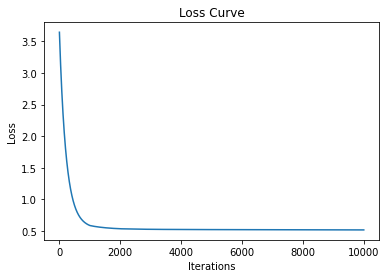

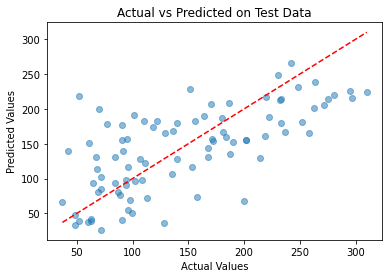

In [492]:
# Load all features
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Convert to NumPy arrays
X_array = df_X.to_numpy()
y_array = df_y.to_numpy().ravel()

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_array)  # Scale features
y_scaled = (y_array - np.mean(y_array)) / np.std(y_array)  # Scale target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize weights and bias
W = np.random.randn(X_train.shape[1])  # Adjust for the number of features
b = np.random.randn()

# Hyperparameters
LEARNING_RATE = 0.001  # Try a smaller learning rate
EPOCHS = 10000  # Adjust number of epochs
L2_LAMBDA = 0.001  # Lower L2 regularization

# Training (same as before)
losses = []
best_loss = float("inf")
early_stop_counter = 0

for i in range(1, EPOCHS + 1):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)

    # Adaptive Learning Rate
    if i % 1000 == 0 and LEARNING_RATE > 0.0001:
        LEARNING_RATE *= 0.5  # Decrease learning rate over time

    # Early Stopping
    if L < best_loss:
        best_loss = L
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter > 100:
            print(f"Early stopping at iteration {i}, loss: {L:.4f}")
            break

    # Print loss every 500 iterations
    if i % 500 == 0:
        print(f'Iteration {i} : Loss {L:.4f}')

# Predictions and evaluation
y_pred = np.dot(X_test, W) + b

# Convert back to original scale
y_test_original = y_test * np.std(y_array) + np.mean(y_array)
y_pred_original = y_pred * np.std(y_array) + np.mean(y_array)

# Calculate Metrics
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Final MSE: {mse:.4f}")
print(f"Final R² Score: {r2:.4f}")

# Plot Loss Curve
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# Scatter Plot: Actual vs Predicted
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted on Test Data")
plt.show()

Iteration 1000 : Loss 0.5861
Iteration 2000 : Loss 0.5850
Iteration 3000 : Loss 0.5845
Iteration 4000 : Loss 0.5843
Iteration 5000 : Loss 0.5843
Iteration 6000 : Loss 0.5842
Iteration 7000 : Loss 0.5842
Iteration 8000 : Loss 0.5841
Iteration 9000 : Loss 0.5841
Iteration 10000 : Loss 0.5840
Iteration 11000 : Loss 0.5840
Iteration 12000 : Loss 0.5839
Iteration 13000 : Loss 0.5839
Iteration 14000 : Loss 0.5838
Iteration 15000 : Loss 0.5838
Iteration 16000 : Loss 0.5837
Iteration 17000 : Loss 0.5836
Iteration 18000 : Loss 0.5835
Iteration 19000 : Loss 0.5835
Iteration 20000 : Loss 0.5834
Iteration 21000 : Loss 0.5833
Iteration 22000 : Loss 0.5832
Iteration 23000 : Loss 0.5832
Iteration 24000 : Loss 0.5831
Iteration 25000 : Loss 0.5830
Iteration 26000 : Loss 0.5829
Iteration 27000 : Loss 0.5829
Iteration 28000 : Loss 0.5828
Iteration 29000 : Loss 0.5827
Iteration 30000 : Loss 0.5826
Iteration 31000 : Loss 0.5825
Iteration 32000 : Loss 0.5825
Iteration 33000 : Loss 0.5824
Iteration 34000 : L

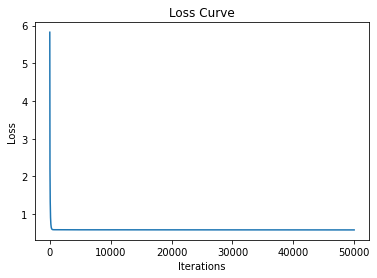

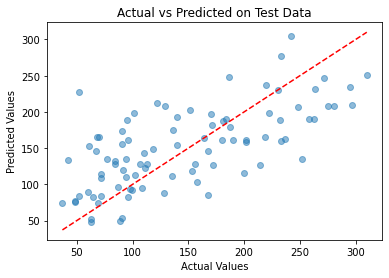

In [494]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
import pandas as pd

# Load dataset
diabetes = load_diabetes()
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=["target"])

# Select features (use all features for now)
df_X_reduced = df_X

# Convert to NumPy arrays
X_array_reduced = df_X_reduced.to_numpy()
y_array = df_y.to_numpy().ravel()

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_array_reduced)  # Scale features
y_scaled = (y_array - np.mean(y_array)) / np.std(y_array)  # Scale target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize weights and bias with He initialization
W = np.random.randn(X_train.shape[1]) * np.sqrt(2. / X_train.shape[1])  # He Initialization for all features
b = np.random.randn()

# Hyperparameters
LEARNING_RATE = 0.0005  # Lower learning rate further
EPOCHS = 50000  # Number of epochs
L2_LAMBDA = 0.001  # Regularization strength
BATCH_SIZE = 32  # Increased batch size
EARLY_STOPPING_PATIENCE = 300  # Patience for early stopping

# Gradient Function (Mini-batch Gradient Descent)
def gradient(X, W, b, y):
    n = X.shape[0]
    y_pred = np.dot(X, W) + b
    error = y_pred - y
    dW = (2/n) * np.dot(X.T, error) + (L2_LAMBDA * W)  # L2 Regularization Term
    db = (2/n) * np.sum(error)
    return dW, db

# Loss Function
def loss(X, W, b, y):
    y_pred = np.dot(X, W) + b
    mse_loss = np.mean((y_pred - y) ** 2)
    return mse_loss

# Training (Mini-batch Gradient Descent)
losses = []
best_loss = float("inf")
early_stop_counter = 0

for i in range(1, EPOCHS + 1):
    # Mini-batch Gradient Descent
    for j in range(0, X_train.shape[0], BATCH_SIZE):
        X_batch = X_train[j:j+BATCH_SIZE]
        y_batch = y_train[j:j+BATCH_SIZE]
        dW, db = gradient(X_batch, W, b, y_batch)
        W -= LEARNING_RATE * dW
        b -= LEARNING_RATE * db

    L = loss(X_train, W, b, y_train)
    losses.append(L)

    # Adaptive Learning Rate
    if i % 1000 == 0 and LEARNING_RATE > 0.0001:
        LEARNING_RATE *= 0.5  # Decrease learning rate over time

    # Early Stopping
    if L < best_loss:
        best_loss = L
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter > EARLY_STOPPING_PATIENCE:
            print(f"Early stopping at iteration {i}, loss: {L:.4f}")
            break

    # Print loss every 1000 iterations
    if i % 1000 == 0:
        print(f'Iteration {i} : Loss {L:.4f}')

# Predictions
y_pred = np.dot(X_test, W) + b

# Convert back to original scale
y_test_original = y_test * np.std(y_array) + np.mean(y_array)
y_pred_original = y_pred * np.std(y_array) + np.mean(y_array)

# Calculate Metrics
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Final MSE: {mse:.4f}")
print(f"Final R² Score: {r2:.4f}")

# Plot Loss Curve
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# Scatter Plot: Actual vs Predicted
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted on Test Data")
plt.show()

Iteration 1000 : Loss 0.6094
Iteration 2000 : Loss 0.5929
Iteration 3000 : Loss 0.5855
Iteration 4000 : Loss 0.5821
Iteration 5000 : Loss 0.5804
Iteration 6000 : Loss 0.5796
Iteration 7000 : Loss 0.5792
Iteration 8000 : Loss 0.5790
Iteration 9000 : Loss 0.5789
Iteration 10000 : Loss 0.5789
Iteration 11000 : Loss 0.5788
Iteration 12000 : Loss 0.5788
Iteration 13000 : Loss 0.5788
Iteration 14000 : Loss 0.5788
Iteration 15000 : Loss 0.5788
Iteration 16000 : Loss 0.5788
Iteration 17000 : Loss 0.5788
Iteration 18000 : Loss 0.5788
Iteration 19000 : Loss 0.5788
Iteration 20000 : Loss 0.5788
Iteration 21000 : Loss 0.5788
Iteration 22000 : Loss 0.5788
Iteration 23000 : Loss 0.5788
Iteration 24000 : Loss 0.5788
Iteration 25000 : Loss 0.5788
Iteration 26000 : Loss 0.5788
Iteration 27000 : Loss 0.5788
Iteration 28000 : Loss 0.5788
Iteration 29000 : Loss 0.5788
Iteration 30000 : Loss 0.5788
Final MSE: 2994.7705
Final R² Score: 0.4348


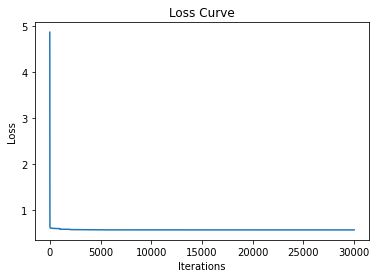

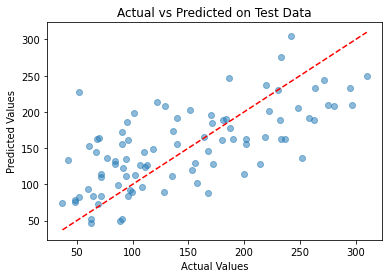

In [497]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
import pandas as pd

# Load dataset
diabetes = load_diabetes()
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target, columns=["target"])

# Select features (use all features for now)
df_X_reduced = df_X

# Convert to NumPy arrays
X_array_reduced = df_X_reduced.to_numpy()
y_array = df_y.to_numpy().ravel()

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_array_reduced)  # Scale features
y_scaled = (y_array - np.mean(y_array)) / np.std(y_array)  # Scale target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize weights and bias with He initialization
W = np.random.randn(X_train.shape[1]) * np.sqrt(2. / X_train.shape[1])  # He Initialization for all features
b = np.random.randn()

# Hyperparameters
LEARNING_RATE = 0.01  # Further reduced learning rate
EPOCHS = 30000  # Increased number of epochs
L2_LAMBDA = 0.01  # Increased regularization strength
BATCH_SIZE = 32  # Batch size remains the same
EARLY_STOPPING_PATIENCE = 300  # Patience for early stopping

# Gradient Function (Mini-batch Gradient Descent)
def gradient(X, W, b, y):
    n = X.shape[0]
    y_pred = np.dot(X, W) + b
    error = y_pred - y
    dW = (2/n) * np.dot(X.T, error) + (L2_LAMBDA * W)  # L2 Regularization Term
    db = (2/n) * np.sum(error)
    return dW, db

# Loss Function
def loss(X, W, b, y):
    y_pred = np.dot(X, W) + b
    mse_loss = np.mean((y_pred - y) ** 2)
    return mse_loss

# Training (Mini-batch Gradient Descent)
losses = []
best_loss = float("inf")
early_stop_counter = 0

for i in range(1, EPOCHS + 1):
    # Mini-batch Gradient Descent
    for j in range(0, X_train.shape[0], BATCH_SIZE):
        X_batch = X_train[j:j+BATCH_SIZE]
        y_batch = y_train[j:j+BATCH_SIZE]
        dW, db = gradient(X_batch, W, b, y_batch)
        W -= LEARNING_RATE * dW
        b -= LEARNING_RATE * db

    L = loss(X_train, W, b, y_train)
    losses.append(L)

    # Adaptive Learning Rate
    if i % 1000 == 0 and LEARNING_RATE > 0.00001:
        LEARNING_RATE *= 0.5  # Decrease learning rate over time

    # Early Stopping
    if L < best_loss:
        best_loss = L
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter > EARLY_STOPPING_PATIENCE:
            print(f"Early stopping at iteration {i}, loss: {L:.4f}")
            break

    # Print loss every 1000 iterations
    if i % 1000 == 0:
        print(f'Iteration {i} : Loss {L:.4f}')

# Predictions
y_pred = np.dot(X_test, W) + b

# Convert back to original scale
y_test_original = y_test * np.std(y_array) + np.mean(y_array)
y_pred_original = y_pred * np.std(y_array) + np.mean(y_array)

# Calculate Metrics
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Final MSE: {mse:.4f}")
print(f"Final R² Score: {r2:.4f}")

# Plot Loss Curve
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# Scatter Plot: Actual vs Predicted
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted on Test Data")
plt.show()

In [466]:
#9-2

#1 데이터 가져오기
import pandas as pd

# 파일 경로 지정
file_path = "~/data/data/bike-sharing-demand/train.csv"

# CSV 파일 불러오기
train = pd.read_csv(file_path)

In [467]:
#datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
import matplotlib.pyplot as plt
import seaborn as sns

# datetime 컬럼을 datetime 형식으로 변환
train["datetime"] = pd.to_datetime(train["datetime"])

# 연, 월, 일, 시, 분, 초 컬럼 생성
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

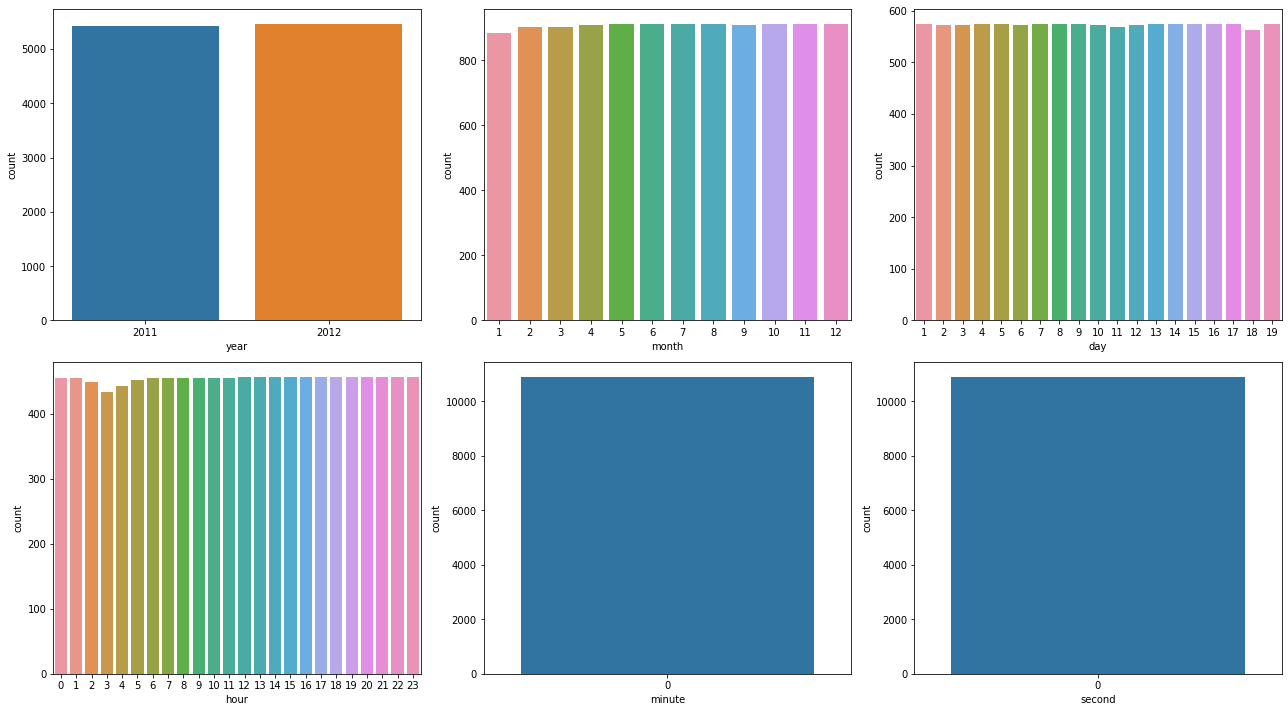

In [471]:
import seaborn as sns
import matplotlib.pyplot as plt

# 서브플롯 설정
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 각 변수에 대해 countplot 그리기
sns.countplot(x='year', data=train, ax=axes[0, 0])
sns.countplot(x='month', data=train, ax=axes[0, 1])
sns.countplot(x='day', data=train, ax=axes[0, 2])
sns.countplot(x='hour', data=train, ax=axes[1, 0])
sns.countplot(x='minute', data=train, ax=axes[1, 1])
sns.countplot(x='second', data=train, ax=axes[1, 2])

plt.tight_layout()
plt.show()

In [474]:
from sklearn.model_selection import train_test_split

# y 변수 (타겟)
y = train['count']

# X 변수 (특징)
X = train[['hour', 'year', 'month', 'temp', 'humidity', 'weather']]

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [475]:
from sklearn.linear_model import LinearRegression

# 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [476]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 예측값 출력
y_pred = model.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# RMSE 계산
rmse = np.sqrt(mse)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

MSE: 19991.9168
RMSE: 141.3928


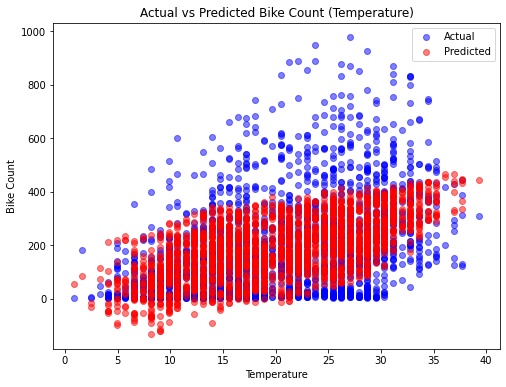

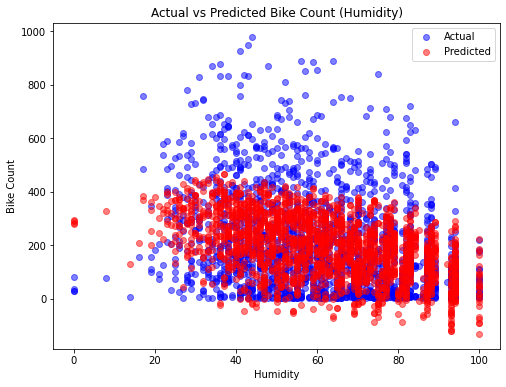

In [477]:
# temp와 count 간의 관계 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_test['temp'], y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test['temp'], y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Temperature')
plt.ylabel('Bike Count')
plt.title('Actual vs Predicted Bike Count (Temperature)')
plt.legend()
plt.show()

# humidity와 count 간의 관계 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_test['humidity'], y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test['humidity'], y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Humidity')
plt.ylabel('Bike Count')
plt.title('Actual vs Predicted Bike Count (Humidity)')
plt.legend()
plt.show()